<a href="https://colab.research.google.com/github/haticeaydinn/tensorflow-implementation/blob/master/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation

TensorFlow 1.x selected.


In [0]:
# generation some house sizes between 1000 and 3500 (typical sq ft of house)
num_house = 160
np.random.seed(42)
house_size = np.random.randint(low=1000, high=3500, size=num_house)
# print(house_size)


# generate house prices from from house size with a random noise added
np.random.seed(42)
house_price = house_size * 100 + np.random.randint(low=20000, high=70000, size=num_house)
# print(house_price)

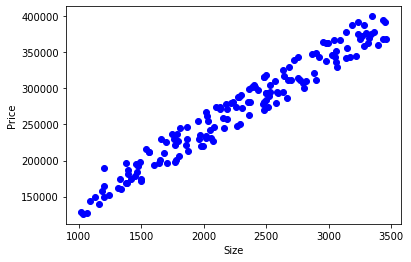

In [3]:
# plot generated house and size
plt.plot(house_size, house_price, 'bo')
plt.ylabel("Price")
plt.xlabel("Size")
plt.show()

In [0]:
# need to normalize values to prevent under/overflows
def normalize(array):
  return (array - array.mean()) / array.std() # Standard Score normalization formula

# define number of training samples, 70%. Take the first 70% since the values are randomized
num_train_samples = math.floor(num_house * 0.7)


In [0]:
# define training data
train_house_size = np.asarray(house_size[:num_train_samples])
train_house_price = np.asanyarray(house_price[:num_train_samples])

train_house_size_norm = normalize(train_house_size)
train_house_price_norm = normalize(train_house_price)

In [0]:
# define test data
test_house_size = np.asarray(house_size[num_train_samples:])
test_house_price = np.asanyarray(house_price[num_train_samples:])

test_house_size_norm = normalize(test_house_size)
test_house_price_norm = normalize(test_house_price)

In [0]:
# set up TF placeholders that get updated as we descend down to gradient
tf_house_size = tf.placeholder("float", name="house_size")
tf_house_price = tf.placeholder("float", name="house_price")

# it is a linear regression problem. So we use this equation --> y' = w*x + b (w=size_factor and b=price_offset)
# define the variables holding the size_factor and price we set during training
# we initialize them to some random values based on the normal distribution
tf_size_factor = tf.Variable(np.random.randn(), name="size_factor")
tf_price_offset = tf.Variable(np.random.randn(), name="price_offset")


In [0]:
# define the operations for the predicted values
tf_price_pred = tf.add(tf.multiply(tf_house_price, tf_size_factor), tf_price_offset)

# define the loss function
tf_cost = tf.reduce_sum(tf.pow(tf_price_pred - tf_house_price, 2)) / (2*num_train_samples)

In [9]:
# optimizer learning rate that is the size of the steps down gradient
learning_rate = 0.1

# define a Gradient Descent Optimizer taht will minimize the loss defined in the operation "cost"
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(tf_cost)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


iteration #: 02 cost= 0.000293750 size_factor= 0.095319286 price_offset= -0.7820396
iteration #: 04 cost= 0.000196708 size_factor= 0.25949615 price_offset= -0.64017224
iteration #: 06 cost= 0.000131724 size_factor= 0.39387918 price_offset= -0.52404034
iteration #: 08 cost= 0.000088209 size_factor= 0.5038749 price_offset= -0.42897546
iteration #: 10 cost= 0.000059069 size_factor= 0.5939092 price_offset= -0.35115603
iteration #: 12 cost= 0.000039555 size_factor= 0.6676041 price_offset= -0.28745398
iteration #: 14 cost= 0.000026488 size_factor= 0.7279258 price_offset= -0.23530789
iteration #: 16 cost= 0.000017737 size_factor= 0.77730066 price_offset= -0.19262147
iteration #: 18 cost= 0.000011878 size_factor= 0.8177151 price_offset= -0.15767857
iteration #: 20 cost= 0.000007954 size_factor= 0.85079545 price_offset= -0.12907462
iteration #: 22 cost= 0.000005326 size_factor= 0.8778726 price_offset= -0.105659574
iteration #: 24 cost= 0.000003566 size_factor= 0.90003586 price_offset= -0.086492

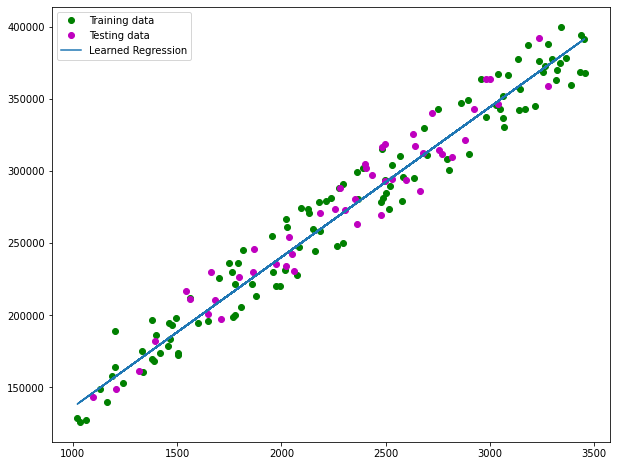

In [37]:
# initialize the variables
init = tf.global_variables_initializer()

# launch the graph in the session
# use with so we dont have to close the session or use the structure below:
#   sess = tf.Session()
#   sess.run()
#   sess.close()
with tf.Session() as sess:
  sess.run(init)

  # set how often to display training process and number of training iteration
  display_every = 2
  num_training_iter = 50

  # keep iterating the training data:
  for iteration in range(num_training_iter):

    # fit all training data
    for (x,y) in zip(train_house_size_norm, train_house_price_norm):
      sess.run(optimizer, feed_dict = {tf_house_size: x, tf_house_price: y}) # feed placeholders

    # display current status
    if (iteration + 1) % display_every == 0:
      c = sess.run(tf_cost, feed_dict = {tf_house_size: x, tf_house_price: y})
      print("iteration #:", '%02d' % (iteration + 1), "cost=", "{:.9f}".format(c), \
            "size_factor=", sess.run(tf_size_factor), "price_offset=", sess.run(tf_price_offset))
      
  print("Optimizer finished!")
  training_cost = sess.run(tf_cost, feed_dict = {tf_house_size: train_house_size_norm, tf_house_price: train_house_price_norm})
  print("Trained cost=", training_cost, "size_factor=", sess.run(tf_size_factor), "price_offset=", sess.run(tf_price_offset), "\n")

  # plot of training and test data, and learned regression
  # get values used to normalized data so we can denormalize data back to its original scale
  train_house_size_mean = train_house_size.mean()
  train_house_size_std = train_house_size.std()


  train_house_price_mean = train_house_price.mean()
  train_house_price_std = train_house_price.std()

  # plot the graph
  plt.rcParams["figure.figsize"] = (10,8)
  plt.figure()
  plt.ylabel = "Price"
  plt.xlabel = "Size (sq.ft)"
  plt.plot(train_house_size, train_house_price, "go", label="Training data")
  plt.plot(test_house_size, test_house_price, "mo", label="Testing data")
  plt.plot(train_house_size_norm * train_house_size_std + train_house_size_mean,
           (sess.run(tf_size_factor) * train_house_size_norm + sess.run(tf_price_offset)) * train_house_price_std + train_house_price_mean,
           label="Learned Regression")
  
  plt.legend(loc="upper left")
  plt.show()



